In [48]:
import numpy as np
import pandas as pd
import seaborn as sns # visualize

from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [4]:
df = pd.read_csv('studentAlcScore.csv')
df.head()

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,1,4,4,3,4,1,2,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,0,1,1,3,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,0,1,1,3,1,1,1,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,0,4,2,5,2,1,1,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,0,3,3,1,1,0,1,...,4,3,2,1,2,5,4,6,10,10


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0, 0.5, 'sex'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'address'),
  Text(0, 3.5, 'Pstatus'),
  Text(0, 4.5, 'Medu'),
  Text(0, 5.5, 'Fedu'),
  Text(0, 6.5, 'Mjob'),
  Text(0, 7.5, 'Fjob'),
  Text(0, 8.5, 'guardian'),
  Text(0, 9.5, 'traveltime'),
  Text(0, 10.5, 'studytime'),
  Text(0, 11.5, 'failures'),
  Text(0, 12.5, 'schoolsup'),
  Text(0, 13.5, 'famsup'),
  Text(0, 14.5, 'paid'),
  Text(0, 15.5, 'activities'),
  Text(0, 16.5, 'nursery'),
  Text(0, 17.5, 'higher'),
  Text(0, 18.5, 'internet'),
  Text(0, 19.5, 'romantic'),
  Text(0, 20.5, 'famrel'),
  Text(0, 21.5, 'freetime'),
  Text(0, 22.5, 'goout'),
  Text(0, 23.5, 'Dalc'),
  Text(0, 24.5, 'Walc'),
  Text(0, 25.5, 'health'),
  Text(0, 26.5, 'absences'),
  Text(0, 27.5, 'G1'),
  Text(0, 28.5, 'G2'),
  Text(0, 29.5, 'G3')

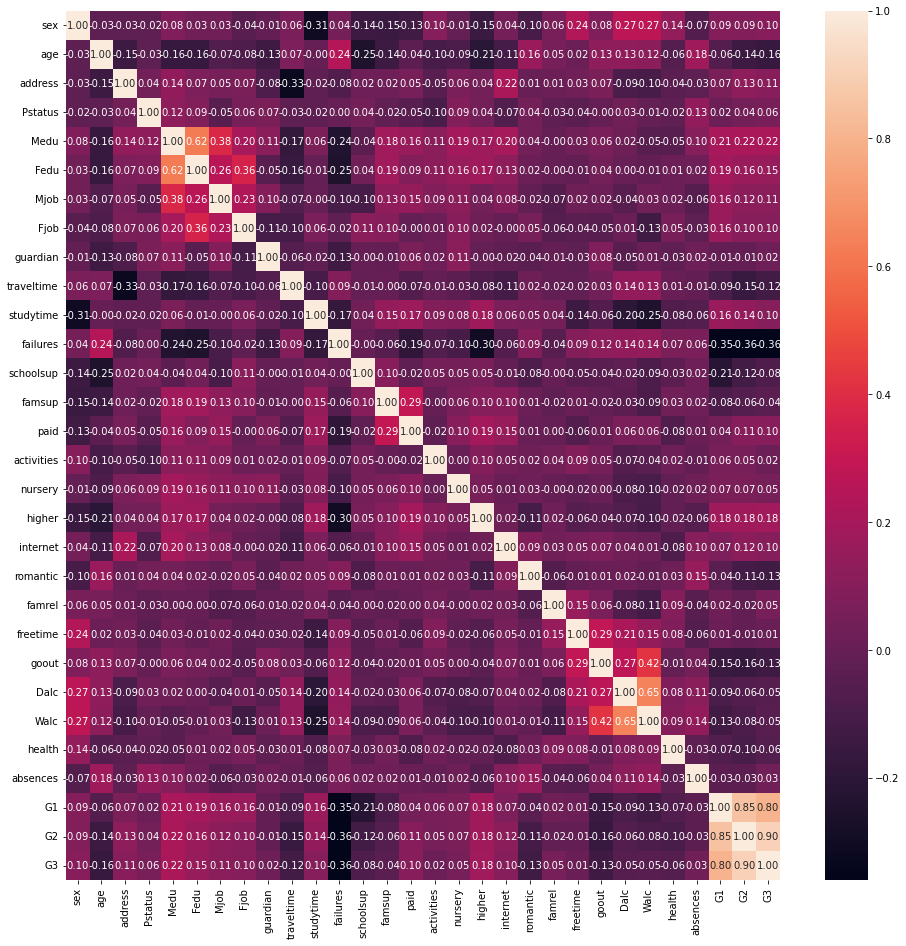

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [17]:
#plt.figure(figsize=(18,18))
#sns.heatmap(df.cov(),annot = True,fmt = ".2f",cbar = True)
#plt.xticks(rotation=90)
#plt.yticks(rotation = 0)

In [51]:
# All attributes & all people

# All attributes as independent variables
x = df.drop(['G1', 'G2', 'G3'], axis=1)
# Dependent variable
y = df['G3']

# Just men
#df_men = df.loc[df['sex'] == 0]

# All attributes as independent variables
#x = x.drop(['G1', 'G2', 'G3'], axis=1)
# Dependent variable
#y = df_men['G3']

# All variables with just women
#x = df.loc[df['sex'] == 1]

# Dependent variable
#y = df['G3']

# Using all variables are predictor variables
#x = df.drop(['G1', 'G2', 'G3'], axis=1)

# All variables with just men
#df_men = df.loc[df['sex'] == 0]
#x = x.drop(['G1', 'G2', 'G3'], axis=1)

# All variables with just women
#x = df.loc[df['sex'] == 1]

# Dependent variable
#y = df['G3']

# Add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     4.333
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.96e-11
Time:                        12:03:11   Log-Likelihood:                -1106.5
No. Observations:                 395   AIC:                             2269.
Df Residuals:                     367   BIC:                             2380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6756      4.030      2.897      0.0

In [57]:
# Just women
df_men = df.loc[df['sex'] == 0]

# All attributes as independent variables
x = df_men.drop(['G1', 'G2', 'G3'], axis=1)
# Dependent variable
y = df_men['G3']

# Add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.309
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           0.000725
Time:                        12:06:19   Log-Likelihood:                -583.28
No. Observations:                 208   AIC:                             1221.
Df Residuals:                     181   BIC:                             1311.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4795      6.387      1.328      0.1

In [54]:
# All variables with just men
df_wmen = df.loc[df['sex'] == 1]

# Using all variables are predictor variables
x = df_wmen.drop(['G1', 'G2', 'G3'], axis=1)

# Dependent variable
y = df_wmen['G3']

# Add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     3.384
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.16e-06
Time:                        12:05:16   Log-Likelihood:                -504.93
No. Observations:                 187   AIC:                             1064.
Df Residuals:                     160   BIC:                             1151.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex           17.7217      5.572      3.180      0.0

In [39]:
#Fit a regression model using x and y. linear_model.LinearRegression() is the Ordinary least squares Linear Regression.
regr = linear_model.LinearRegression()
regr.fit(x, y)

#Print the Intercept and Coefficients of the regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 11.675602891861983
Coefficients: 
 [-1.00391886e-16  1.10834368e+00 -2.71286599e-01  5.13612905e-01
  6.40405978e-01  4.35953263e-01 -1.46907869e-01  5.92785568e-02
  4.09244262e-01 -2.26561801e-01 -1.86874070e-01  4.75563382e-01
 -1.65653441e+00 -1.30869254e+00 -8.73378030e-01  3.59128462e-01
 -3.18602111e-01 -1.48713218e-01  1.54374696e+00  4.72159027e-01
 -1.00228493e+00  2.17584263e-01  3.04864864e-01 -5.80398714e-01
 -2.75740276e-01  2.69738180e-01 -1.87689539e-01  5.37966919e-02]


In [40]:
sex = 0
age = 18
address = 1
Pstatus = 1
Medu = 4
Fedu = 4
Mjob = 1
Fjob = 1
guardian = 1
traveltime = 1
studytime = 1
failures = 0
schoolsup = 0
famsup = 0
paid = 0
activities = 0
nursery = 0
higher = 1
internet = 1
romantic = 1
famrel = 4
freetime = 4
goout = 4
Dalc = 2
Walc = 4
health = 5
absences = 4

print ('Predicted G3: \n', regr.predict([[sex, age, address, Pstatus, Medu, Fedu, Mjob, Fjob, guardian, traveltime, studytime, failures,
                                         schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime,
                                         goout, Dalc, Walc, health, absences]]))
print('\n')

C:\Users\miner\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 27 features, but LinearRegression is expecting 28 features as input.

In [18]:
###Split the features from the class (taregt) variable###

x = df[['Medu', 'Fedu']].values
y = df['G3'].values

In [19]:
###Define a Naive Bayes classifer###

# class sklearn.naive_bayes.GaussianNB()
    # Gaussian Naive Bayes (GaussianNB)

nb_clf = GaussianNB()

In [22]:
# Cross Validtaion 
# klearn.model_selection.cross_validate(estimator, X, y=None, cv=None)

# Parameters 

    # estimator: estimator object implementing ‘fit’
      # The object to use to fit the data.

    # X: array-like of shape (n_samples, n_features)
      # The data to fit. Can be for example a list, or an array. 

    # y: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
      # The target variable to try to predict in the case of supervised learning.

    # cv: int, cross-validation generator or an iterable, default=None
      # Determines the cross-validation splitting strategy. Possible inputs for cv are:
      # None, to use the default 5-fold cross validation,

cvResults = cross_validate(nb_clf, x, y, cv=10)
cvResults

C:\Users\miner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.00402355, 0.00299263, 0.00199676, 0.00195789, 0.00199819,
        0.00099993, 0.00301361, 0.00199533, 0.00100255, 0.00099373]),
 'score_time': array([0.00195765, 0.0009954 , 0.00103569, 0.00103426, 0.        ,
        0.00197101, 0.        , 0.00099587, 0.00100017, 0.00099421]),
 'test_score': array([0.1       , 0.1       , 0.175     , 0.125     , 0.1       ,
        0.12820513, 0.07692308, 0.12820513, 0.12820513, 0.12820513])}

In [25]:
# Evaluate a score by cross-validation
# sklearn.model_selection.cross_val_score(estimator, X, y=None, cv=None)

# Parameter 
    # estimator: estimator object implementing ‘fit’
      # The object to use to fit the data

    # X: array-like of shape (n_samples, n_features)
      # The data to fit. Can be for example a list, or an array

    # y: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
      # The target variable to try to predict in the case of supervised learning

    # cv: int, cross-validation generator or an iterable, default=None
      # Determines the cross-validation splitting strategy. Possible inputs for cv are:
        # None, to use the default 5-fold cross validation
        # int, to specify the number of folds in a (Stratified)KFold

scores = cross_val_score(nb_clf, x, y, cv=10)
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.12


C:\Users\miner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [28]:
y_pred = cross_val_predict(nb_clf, x, y, cv=10)
y_pred

C:\Users\miner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([15, 10, 10, 10, 11,  4, 10, 14, 10, 11, 15, 10, 15,  4, 10, 15, 15,
       11, 10,  4,  4, 14, 11, 10, 11, 10, 10, 11, 11, 15, 15, 15,  4, 11,
       10, 10,  4, 14, 11, 10, 10, 14, 14, 10, 10,  4, 11,  4, 11, 15, 10,
       10, 10, 14, 11, 10,  4, 14, 10, 10, 14, 10, 10,  4,  4,  4, 14, 10,
       10, 10, 10, 11,  0, 10, 11,  4, 10, 10, 10, 11, 11, 10, 10, 10, 10,
       14, 10, 11, 10, 14, 11,  4, 10, 10, 10, 10,  4, 10, 14,  4, 15, 14,
       15, 10, 11, 11, 10, 11, 14, 15, 14, 11, 10, 10, 10, 14, 15, 11, 10,
       11, 10, 10, 11, 15, 10, 11, 11, 10, 10, 14, 11, 10, 10, 11, 11, 14,
       11, 11, 10, 14,  4, 10, 14, 10, 10, 10, 10, 10, 14, 10, 10, 10, 11,
       10, 15, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14,
       11,  0, 14, 10, 11,  4, 10, 11, 10,  4,  4, 11, 11, 11, 10, 11, 10,
       10, 11, 10, 11, 10, 10, 11, 10, 11, 15, 11, 14, 15,  4, 10, 10, 10,
       10, 11, 10, 20, 10,  4, 11, 14, 10, 10, 15, 10, 20, 11, 10, 10, 10,
       10, 11, 10, 15, 10

In [29]:
print("Confusion Matrix")
cmtx = pd.DataFrame(confusion_matrix(y, y_pred, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']),
                    index=['true:0', 'true:1', 'true:2', 'true:3', 'true:4', 'true:5', 'true:6', 'true:7', 'true:8', 'true:9', 'true:10', 'true:11', 'true:12', 'true:13', 'true:14', 'true:15', 'true:16', 'true:17', 'true:18', 'true:19', 'true:20'], 
                    columns=['pred:0', 'pred:1', 'pred:2', 'pred:3', 'pred:4', 'pred:5', 'pred:6', 'pred:7', 'pred:8', 'pred:9', 'pred:10', 'pred:11', 'pred:12', 'pred:13', 'pred:14', 'pred:15', 'pred:16', 'pred:17', 'pred:18', 'pred:19', 'pred:20'])
    
cmtx

Confusion Matrix


,pred:0,pred:1,pred:2,pred:3,pred:4,pred:5,pred:6,pred:7,pred:8,pred:9,...,pred:11,pred:12,pred:13,pred:14,pred:15,pred:16,pred:17,pred:18,pred:19,pred:20
true:0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true:9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print("Calssictaion Report")
cr = classification_report(y, y_pred)
print(cr.split('macro avg')[0])

Calssictaion Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        28
          10       0.16      0.59      0.25        56
          11       0.13      0.21      0.16        47
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        31
          14       0.08      0.15      0.11        27
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         5
       

C:\Users\miner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
